In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = np.genfromtxt('accel_data2.csv', delimiter=',', skip_header=1)
# only take first 600 data points
data_up = data[200:1000]
data_down = data[1000:1400]
print(data_up)
print(data_down)

[[ 2.0008695   0.14535997  0.30963828 -0.06303298  0.3478197 ]
 [ 2.0108625  -0.17935144 -0.09875763 -0.22629251  0.30516931]
 [ 2.0208565  -0.27734513 -0.22098886  0.1662457   0.3916555 ]
 ...
 [ 9.96575408 -0.11202585 -0.09689516  0.13080338  0.19760564]
 [ 9.97574708 -0.04277472 -0.08205887  0.04539077  0.10307113]
 [ 9.98574108  0.01379048 -0.07345309 -0.0342524   0.08221168]]
[[ 9.99573408  0.07927779 -0.09235626 -0.05481005  0.13348703]
 [10.00572808  0.17432801 -0.1186946  -0.11619821  0.24079179]
 [10.01572108  0.20633103 -0.07463291 -0.18661447  0.28804084]
 ...
 [13.9631775   0.39366628  0.78649801  0.49674494  1.01010287]
 [13.9731705   0.51036395  0.42555951  0.93524226  1.14727954]
 [13.9831645   0.49712348 -0.07624119  1.34680029  1.43764234]]


In [31]:
time_up = data_up[:,0]
z_accel_up = data_up[:,3]
time_down = data_down[:,0]
z_accel_down = data_down[:,3]

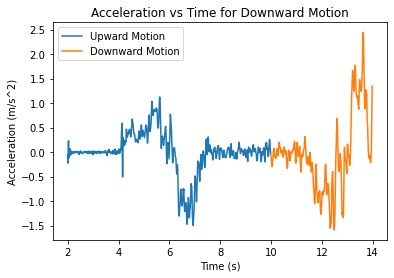

In [32]:
plt.plot(time_up, z_accel_up)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time for Upward Motion')

plt.plot(time_down, z_accel_down)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time for Downward Motion')

plt.legend(['Upward Motion', 'Downward Motion'])

In [33]:
# get the integral of the acceleration data at every time point without using np.cumsum
velocity_up = np.zeros(len(z_accel_up))
for enum, i in enumerate(data):
    if enum<len(z_accel_up)-1:
        time_delta = time_up[enum+1] - time_up[enum]
        velocity_up[enum] = sum(z_accel_up[:enum+1]*time_delta)

In [34]:
velocity_down = np.zeros(len(z_accel_down))
for enum, i in enumerate(data):
    if enum<len(z_accel_down)-1:
        time_delta = time_down[enum+1] - time_down[enum]
        velocity_down[enum] = sum(z_accel_down[:enum+1]*time_delta)

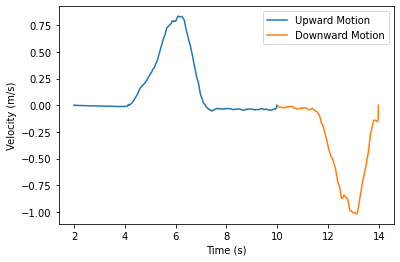

In [35]:
plt.plot(time_up, velocity_up)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.plot(time_down, velocity_down)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Upward Motion', 'Downward Motion'])

In [36]:
distance_down = np.zeros(len(velocity_down))
for enum, i in enumerate(velocity_down):
    if enum<len(velocity_down)-1:
        time_delta = time_down[enum+1] - time_down[enum]
        distance_down[enum] = sum(velocity_down[:enum+1]*time_delta)

In [37]:
distance_up = np.zeros(len(velocity_up))
for enum, i in enumerate(velocity_up):
    if enum<len(velocity_up)-1:
        time_delta = time_up[enum+1] - time_up[enum]
        distance_up[enum] = sum(velocity_up[:enum+1]*time_delta)

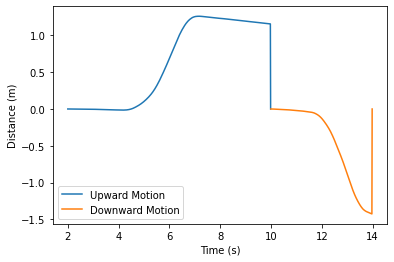

In [38]:
plt.plot(time_up, distance_up)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.plot(time_down, distance_down)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend(['Upward Motion', 'Downward Motion'])

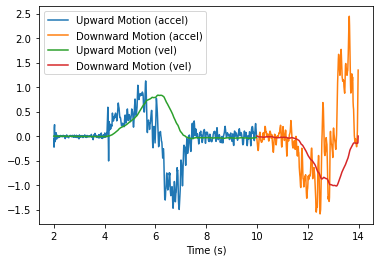

In [46]:
#superimposing all plots
plt.plot(time_up, z_accel_up)
plt.xlabel('Time (s)')
plt.plot(time_down, z_accel_down)
plt.plot(time_up, velocity_up)
plt.plot(time_down, velocity_down)
# plt.plot(time_up, distance_up)
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (m)')
# plt.plot(time_down, distance_down)
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (m)')
plt.legend(['Upward Motion (accel)', 'Downward Motion (accel)', 'Upward Motion (vel)', 'Downward Motion (vel)'])

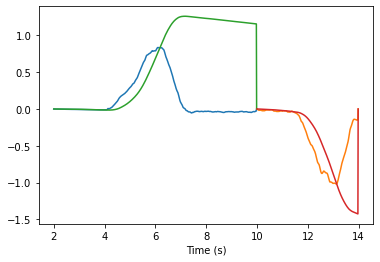

In [47]:
plt.plot(time_up, velocity_up)
plt.plot(time_down, velocity_down)
plt.xlabel('Time (s)')
plt.plot(time_up, distance_up)
plt.plot(time_down, distance_down)